# Trabajo Práctico – Equidad en Aprendizaje Automático
**Materia:** Fairness en AA – 1er cuatrimestre 2025  
**Dataset:** German Credit Data  
**Repositorio:** https://github.com/MateoRomano02/tp_equidad

**Integrantes:** Martin Groisman, Leandro Escudero, Mateo Romano, Valentino Bustos Sak

# 1. Conjunto de Datos

## 1.a) Descarga de los Datos

- **Repositorio del proyecto:** [github.com/MateoRomano02/tp_equidad](https://github.com/MateoRomano02/tp_equidad)
- **Ruta del archivo:** `../data/raw/german.data`

---

## 1.b) Datasheets for Datasets

### i) Motivación

1. **Propósito del conjunto de datos**

   Este dataset se centra en la evaluación del riesgo crediticio, clasificando a los solicitantes de crédito como de *"buen"* o *"mal riesgo"* en función de diversos atributos personales y financieros.

   No encontramos información precisa respecto a la generación de los datos, su contexto o el motivo por el que fueron recopilados. La falta de detalles es criticada por distintos usuarios que comparten y consumen este dataset, e incluso en 2019 se demostró que en Statlog está publicada una tabla de códigos incorrecta, lo que implica features mal interpretados (Grömping, 2019).

   Por este motivo, consideramos utilizar la versión corregida del conjunto de datos, publicada bajo el nombre [*South German Credit*](https://archive.ics.uci.edu/ml/datasets/South+German+Credit), la cual será detallada y analizada en profundidad más adelante en este informe.

2. **Entidad creadora**

   Fue donado a la UCI por el profesor Hans Hofmann de la Universidad de Hamburgo el 16/11/1994. Hofmann donó los datos que se encargó de transcribir del apéndice del libro de Fahrmeir y Hamerle (1984), y si bien ellos documentaron los datos, inicialmente fueron procesados por W.M. Häußler como parte de su tesis doctoral (1979 - 1981) (Grömping, 2019).

---

### ii) Composición

1. **Instancias**

   Las instancias representan personas a las que se les otorgó créditos por medio de un gran banco regional en el sur de Alemania. Cada instancia corresponde a un único crédito/deudor. No hay múltiples tipos de instancias o entidades interactuando; el conjunto de datos se centra en perfiles individuales de créditos/deudores y sus características.

   Hay un total de **1.000 instancias**, compuestas por **300 créditos clasificados como "malos"** y **700 "buenos"**. La clasificación "bueno" o "malo" se basa en si el deudor cumplió o no con las condiciones del contrato de crédito.

---

### iii) Proceso de recopilación

1. **¿Cómo se adquirieron los datos?**

   Los datos fueron adquiridos a partir de registros reales de operaciones bancarias, correspondientes a solicitudes de crédito realizadas entre **1973 y 1975** en un gran banco regional del sur de Alemania.

2. **¿Los datos fueron observados directamente, informados por los sujetos o inferidos de otros datos?**

   Fueron **derivados de otros datos**: tesis doctoral de W.M. Häußler → recopilados por Fahrmeir y Hamerle → transcritos por Hofmann.

3. **¿Se validaron/verificaron los datos derivados?**

   Sí. Hans Hofmann transcribió manualmente las primeras 1.000 filas y verificó los datos mecanografiados contra una tabla resumen del libro original. Además, se compararon versiones posteriores del conjunto de datos, detectando mínimos errores tipográficos y algunas discrepancias categóricas, pero con valores brutos mayormente consistentes (Grömping, 2019).

---

### iv) Preprocesamiento, limpieza y etiquetado

1. **¿Se realizó algún preprocesamiento?**

   Sí, en la versión corregida *South German Credit*. Los principales cambios son:

   - **Corrección de tabla de códigos errónea** en la versión *Statlog/UCI*, que representaba incorrectamente varias variables categóricas:
     - Intercambio de niveles incorrectos en atributos como `people_liable` (A18) y `foreign_worker` (A20).
     - En `personal_status_sex` (A9), el código 2 ahora especifica claramente que combina *"mujeres no solteras"* y *"hombres solteros"*, resolviendo la ambigüedad del conjunto original.
   - **Discretización de variables numéricas**, transformándolas en ordinales o binarias.
   - Aunque no se documenta un manejo explícito de **valores faltantes**, se corrigieron errores tipográficos menores y se verificaron las transcripciones contra fuentes originales.

---

### v) Usos del conjunto de datos

1. **Aplicaciones comunes**

   Este conjunto de datos se ha convertido en un **benchmark clásico** de clasificación en riesgos crediticios. Ha sido empleado en numerosos estudios académicos, cursos universitarios y bibliotecas de aprendizaje automático:

   - Se utiliza en materiales docentes para ilustrar regresión logística, análisis discriminante, árboles de decisión y redes neuronales en tareas de *credit scoring* (Stelzer, 2019).
   - Se encuentra integrado en plataformas como **TensorFlow Datasets** (Google, 2023).
   - Ha sido replicado en versiones derivadas en **Kaggle** para competencias y análisis reproducibles.

2. **Usos en fairness**

   Es un recurso clave en investigaciones sobre equidad algorítmica (*fairness*), dada la presencia de variables sensibles como el género. Por ejemplo, la biblioteca `fairml` en `R` incorpora este conjunto para ilustrar métodos de ajuste de sesgos (Schliep, 2018).

3. **Sistemas y bibliotecas**

   No existe un software comercial específico asociado, pero sí numerosos repositorios de código abierto que lo emplean con bibliotecas como `scikit-learn` o `keras`. También es ampliamente referenciado en estudios comparativos de modelos supervisados (Lemke et al., 2009).

---

### vi) Repositorios disponibles

- **UCI Machine Learning Repository**
  - [Versión original (Statlog)](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data))
  - [Versión corregida (South German Credit)](https://archive.ics.uci.edu/ml/datasets/South+German+Credit)

- **Open Data LMU**
  - [DOI: 10.5282/ubm/data.23](https://doi.org/10.5282/ubm/data.23)

- **Kaggle**
  - [German Credit Dataset](https://www.kaggle.com/uciml/german-credit)

---

## Reflexión, sesgos en el uso de datos historicos

El conjunto de datos fue recolectado entre **1973 y 1975 en Alemania**, lo cual plantea una serie de consideraciones importantes a la hora de utilizarlo en contextos actuales. A continuación, destacamos algunos puntos clave:

- **Contexto social y cultural**: los datos reflejan las condiciones de una época en la que existían desigualdades estructurales significativas en el acceso a servicios financieros, particularmente según **género, edad y nacionalidad**.

- **Posibilidad de sesgos históricos**: estas desigualdades pueden haberse traducido en decisiones de otorgamiento de créditos sesgadas, y por ende, estar presentes en los datos. Aunque el contexto actual haya cambiado, los modelos de aprendizaje automático pueden **aprender y perpetuar esos patrones discriminatorios** si no se toman medidas al respecto.

- **Importancia del análisis crítico**: al trabajar con datos históricos, resulta fundamental adoptar una mirada crítica. No basta con entrenar modelos con buenas métricas; también debemos evaluar sus implicancias sociales.

- **Mitigación necesaria**: es indispensable aplicar técnicas de mitigación de sesgos para reducir la reproducción de discriminaciones injustificadas en aplicaciones modernas.

En definitiva, la antigüedad del dataset no lo invalida, pero sí requiere **un enfoque ético y responsable** en su uso, especialmente cuando se analizan variables sensibles como el género.


---

## Conclusión del punto 1

En conclusión, el conjunto de datos **German Credit Data** constituye una base sólida y ampliamente estudiada para tareas de clasificación binaria.

Es rico en atributos financieros y personales, así como la presencia de variables sensibles como género, lo convierten en un excelente caso de estudio para evaluar y mitigar sesgos en modelos de aprendizaje automático. Esto lo convierte en un punto de partida ideal para pensar no solo en métricas, sino también en el impacto social que pueden tener nuestras decisiones técnicas.

---

## Fuentes consultadas

- Grömping, U. (2019). *South German Credit Data: Correcting a Widely Used Data Set.* Reports in Mathematics, Physics and Chemistry, 04/2019. Fachbereich II, Beuth Hochschule für Technik Berlin. [Link](http://www1.beuth-hochschule.de/FB_II/reports/welcome.htm)
- Google. (2023). *German Credit Numeric Dataset.* TensorFlow Datasets. [Link](https://www.tensorflow.org/datasets/catalog/german_credit_numeric)
- Kaggle. *German Credit Risk Dataset.* [Link](https://www.kaggle.com/datasets)
- Lemke, C., Gabrys, B., & Buhmann, J. M. (2009). *Automatic selection of spectral channels using mutual information.* IEEE Trans. on Pattern Analysis and Machine Intelligence, 28(12), 1939–1951. https://doi.org/10.1109/TPAMI.2006.248
- Schliep, K. (2018). *fairml: Fair Machine Learning.* CRAN. [Link](https://cran.r-project.org/package=fairml)
- Stelzer, E. (2019). *Modelos de evaluación de riesgo crediticio aplicando técnicas de aprendizaje supervisado.* UNLP. [Link](http://sedici.unlp.edu.ar/handle/10915/102542)
- UCI Machine Learning Repository. (1994). *Statlog (German Credit Data) Data Set.* University of California, Irvine. [Link](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))


# Análisis Exploratorio y Detección de Sesgos

## Dataset utilizado

Para el análisis exploratorio empleamos la versión corregida del conjunto de datos, conocida como [*South German Credit*](https://archive.ics.uci.edu/ml/datasets/South+German+Credit), publicada por Grömping (2019). Esta versión corrige errores categóricos presentes en el dataset original (*Statlog*), especialmente en la variable `personal_status_sex`, que combinaba género y estado civil de forma ambigua.

El conjunto contiene **1.000 instancias** y **21 columnas**, entre ellas atributos numéricos, categóricos, y la variable objetivo `target`, que indica si un solicitante representa un "buen" o "mal" riesgo crediticio.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1. Cargar datos corregidos
df = pd.read_csv("../data/raw/SouthGermanCredit.csv")
df = df.rename(columns={"credit_risk": "target"})

# 2. Separar casos certeros y ambiguos
df_certero = df[df["personal_status_sex"] != "female : non-single or male : single"].copy()
df_sin_sex = df[df["personal_status_sex"] == "female : non-single or male : single"].drop(columns=["personal_status_sex"]).copy()

# 3. Reconstruir variables sexo y estado civil
df_certero["sex"] = df_certero["personal_status_sex"].map(lambda x: "female" if "female" in x else "male")

def extract_status(x):
    if "married" in x or "widowed" in x:
        return "married/widowed"
    elif "single" in x:
        return "single"
    elif "divorced" in x or "separated" in x:
        return "divorced/separated"
    return "unknown"

df_certero["personal_status"] = df_certero["personal_status_sex"].map(extract_status)
df_certero = df_certero.drop(columns=["personal_status_sex"])

# 4. Modelado para imputación
feature_cols = [col for col in df_certero.columns if col not in ["sex", "personal_status", "target"]]
X = pd.get_dummies(df_certero[feature_cols], drop_first=True)
y = df_certero["sex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 3]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipeline, param_grid, scoring='recall_macro', cv=cv, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Mejor combinación:", grid.best_params_)
print(classification_report(y_test, grid.predict(X_test)))

# 5. Imputar sexo en df_sin_sex
df_sin_sex_proc = pd.get_dummies(df_sin_sex[feature_cols], drop_first=True)
for col in X.columns.difference(df_sin_sex_proc.columns):
    df_sin_sex_proc[col] = 0
df_sin_sex_proc = df_sin_sex_proc[X.columns]

sex_pred = grid.predict(df_sin_sex_proc)

df_sin_sex_final = df_sin_sex.copy()
df_sin_sex_final["sex"] = sex_pred
df_sin_sex_final["personal_status"] = df_sin_sex_final["sex"].map(
    lambda x: "non-single" if x == "female" else "single"
)

# 6. Dataset final: df_completo
df_completo = pd.concat([df_certero, df_sin_sex_final], ignore_index=True)
df_completo["personal_status"] = df_completo["personal_status"].replace({
    "married/widowed": "non-single",
    "divorced/separated": "single"
})

# 7. Guardar por si querés usarlo después
df_completo.to_csv("../data/processed/south_german_credit_clean.csv", index=False)


In [8]:
import pandas as pd

df = pd.read_csv("../data/raw/SouthGermanCredit.csv")
df = df.rename(columns={"credit_risk": "target"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

## Reconstrucción de género y estado civil

El dataset contiene 310 instancias con la etiqueta ambigua `"female : non-single or male : single"`, que impide recuperar con certeza el género. Para resolver esto implementamos el siguiente proceso:

### Estrategia adoptada

1. Separar las instancias con género claro (`df_certero`) de las ambiguas (`df_sin_sex`).
2. Crear la variable `sex` en base a la presencia del string "female" o "male".
3. Extraer el estado civil en una nueva variable `personal_status` con las siguientes reglas:
   - `"married/widowed"`, `"divorced/separated"` → `"non-single"`
   - `"single"` → `"single"`

Posteriormente, entrenamos un modelo **Random Forest** con validación cruzada y técnica de oversampling SMOTE para predecir el sexo de las 310 instancias ambiguas. Se priorizó el `recall_macro` para mejorar la detección del grupo minoritario (mujeres).


> El modelo mejoró el recall de `female` de 33% a 56% en test set. Esto nos permitió imputar el género de forma más confiable.

Las predicciones se usaron para reconstruir `df_sin_sex_final`, que se completó con las etiquetas de sexo y estado civil imputadas:


## Composición final del dataset

Una vez imputadas las instancias ambiguas:

- 838 instancias fueron clasificadas como **male**
- 162 instancias como **female**

Creamos la variable final `personal_status` agrupando todas las categorías en solo dos:
- `"single"`
- `"non-single"`

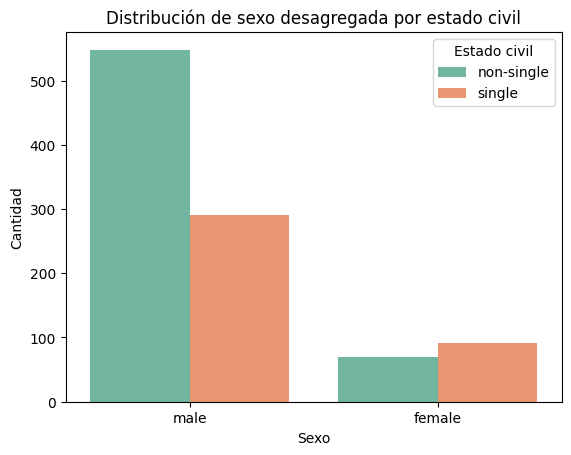

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_completo, x="sex", hue="personal_status", palette="Set2")
plt.title("Distribución de sexo desagregada por estado civil")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(title="Estado civil")
plt.show()

## Distribución de género y estado civil

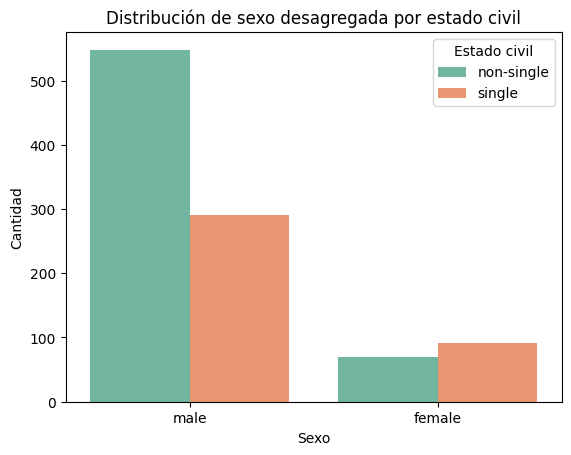

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_completo, x="sex", hue="personal_status", palette="Set2")
plt.title("Distribución de sexo desagregada por estado civil")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(title="Estado civil")
plt.show()

Como se observa:
- La mayoría de las instancias son hombres casados o viudos.
- Las mujeres aparecen tanto en estado "single" como "non-single".

Esta desproporción de género sugiere un primer indicio de desequilibrio que puede generar sesgos si no se compensa adecuadamente.


## Observaciones iniciales sobre sesgos

A partir de las variables `sex`, `personal_status` y `target` podemos observar algunos puntos clave:

- Las mujeres están **subrepresentadas** en el conjunto de datos (16%). Esto puede hacer que el modelo tenga peor desempeño en ese grupo.
- La variable `personal_status_sex`, tal como venía codificada en el dataset original, combinaba sexo y estado civil en una sola categoría. Eso representa una **fuga de información indirecta del género**.
- Algunas variables como `foreign_worker` o `housing` podrían estar correlacionadas con factores sensibles. Requieren atención en etapas posteriores del análisis.

Estas observaciones iniciales no implican que el modelo necesariamente será sesgado, pero sí marcan la necesidad de evaluar equidad de forma explícita.

---

## 2.6 Distribución del riesgo crediticio (`target`)


/var/folders/8s/gtrvqq852fx0ypk0lwv34pw00000gn/T/ipykernel_72268/37697715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_completo, x="target", palette="Set2")


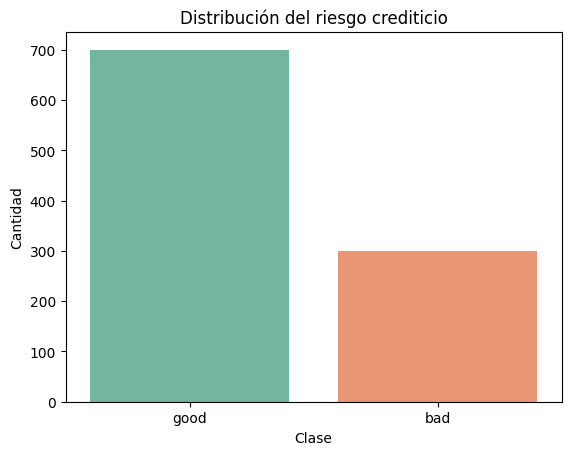

In [23]:
sns.countplot(data=df_completo, x="target", palette="Set2")
plt.title("Distribución del riesgo crediticio")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

El dataset tiene 700 instancias etiquetadas como `good` y 300 como `bad`. Esto representa un **desequilibrio 70/30**, que es común en datasets reales pero que puede influir en la performance del modelo si no se manejan bien las métricas.

---

## Distribución de edad

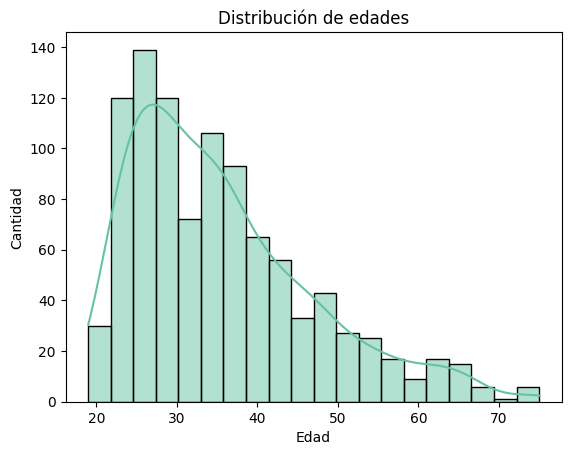

In [20]:
sns.histplot(data=df_completo, x="age", bins=20, kde=True, color="#66c2a5")
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

La mayoría de los solicitantes tienen entre **20 y 50 años**. Hay algunos casos con edad mayor a 60, pero son pocos. La distribución tiene una ligera asimetría hacia la derecha.

---

## Proporción de target por sexo

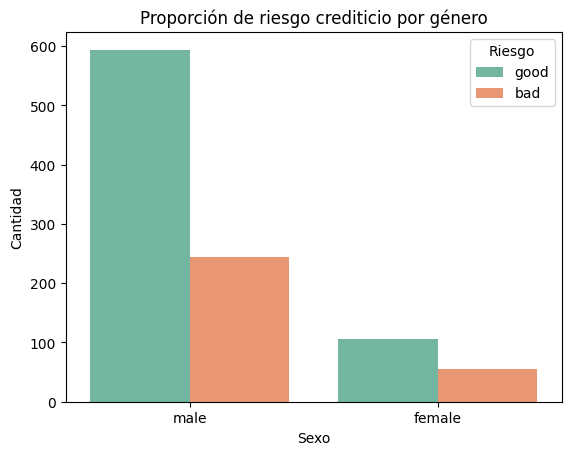

In [21]:
sns.countplot(data=df_completo, x="sex", hue="target", palette="Set2")
plt.title("Proporción de riesgo crediticio por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(title="Riesgo")
plt.show()

Aunque los hombres representan la gran mayoría de los registros, **las mujeres tienen una proporción levemente mayor de casos `good`**. Esto no implica que el modelo será justo por defecto, pero muestra que existen diferencias que deben ser evaluadas con métricas de fairness específicas más adelante.


## Conclusión del análisis exploratorio

En resumen, el análisis exploratorio nos permitio comprender mejor la composición y las particularidades del dataset. Reconstruimos variables clave como el género y el estado civil, identificamos una subrepresentación importante de mujeres, y detectamos posibles fuentes de sesgo en la codificación original de los datos. También observamos un desbalance en la variable objetivo y analizamos la distribución etaria de los solicitantes.

Estos hallazgos no solo nos sirven para entender mejor los datos, sino que también nos preparan para evaluar y mitigar posibles desigualdades en los modelos predictivos que entrenaremos a continuación.

# 02 - Modelo Inicial
Repositorio: [github.com/MateoRomano02/tp_equidad](https://github.com/MateoRomano02/tp_equidad)


Este notebook corresponde al punto N°2, N°3 y N°4 del TP

## Objetivo
Entrenar un modelo de clasificación sobre el dataset *German Credit Data* y evaluar su rendimiento con métricas como accuracy, precision, recall y F1-score. Además, se analizará cuál error es más costoso para el banco.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from holisticai.bias.mitigation import Reweighing
from holisticai.pipeline import Pipeline as HolPipeline
from holisticai.bias.mitigation import CorrelationRemover


## Carga de datos

In [ ]:

df = pd.read_csv("..\data\processed\south_german_credit_clean.csv")

df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target,sex,personal_status
0,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,...,none,for free,2-3,skilled employee/official,3 or more,no,no,good,male,non-single
1,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,...,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,male,non-single
2,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,...,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good,male,non-single
3,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,none,4 <= ... < 7 yrs,...,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,male,non-single
4,no checking account,8,all credits at this bank paid back duly,others,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,none,>= 7 yrs,...,none,rent,2-3,unskilled - resident,0 to 2,no,yes,good,male,non-single


## Modelo

Vamos a entrenar un *Árbol de Decisión* porque es fácil de entender y nos parece adecuado para un primer modelo.

Por el desbalance de clases, conviene usar SMOTE y de paso podemos armar un pipeline para buscar buenos parámetros con Grid Search y validación cruzada.

In [ ]:
# Separar features y target
X = df.drop(columns=["target"])
y = df["target"].map({"good": 1, "bad": 0})  # good = positivo (1), bad = negativo (0)

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir en train/test (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Pipeline con SMOTE + Árbol + GridSearch
pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),  # No estrictamente necesario para árboles, pero se incluye por buenas prácticas
    ("clf", DecisionTreeClassifier(random_state=42))
])

# Definir los hiperparámetros a buscar
param_grid = {
    "clf__max_depth": [3, 5, 10, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 5],
    "clf__criterion": ["gini", "entropy"]
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(
    pipeline, param_grid, scoring="f1", cv=5, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Predicciones
y_pred = grid_search.predict(X_test)

# Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["bad (0)", "good (1)"])
best_params = grid_search.best_params_

In [ ]:
# print de las métrcias
print("=== Métricas del Modelo ===\n")
print("Distribución de clases en el dataset original:")
print(class_distribution, "\n")

print("Mejores hiperparámetros encontrados por GridSearch:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print("\nReporte de clasificación en test:")
print(class_report)

# Plot de la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred. Bad (0)", "Pred. Good (1)"],
            yticklabels=["True Bad (0)", "True Good (1)"])
plt.title("Matriz de Confusión")
plt.ylabel("Valor Real")
plt.xlabel("Predicción")
plt.show()

## Análisis de errores y trade-off

En el contexto bancario, donde el objetivo es **maximizar los préstamos otorgados a personas que efectivamente los van a pagar**, el **falso positivo** (darle un préstamo a alguien que no lo va a pagar) puede representar una **pérdida financiera** significativa.

En cambio, un **falso negativo** (negarle un préstamo a alguien que sí lo iba a pagar) implica una oportunidad perdida, pero no un costo directo. Por eso, **los falsos positivos son el error más costoso** en este escenario.

Esto debería reflejarse en el umbral de decisión y posiblemente en la elección de métricas (por ejemplo, priorizar un FPR bajo).


# 03 - Evaluación de equidad del modelo inicial


## Descripcion de las metricas de fairness vistas en clase para este contexto

1)Statistical Parity:
La proporcion de creditos aprobados de ambos grupos analizados debe ser estar dentro de nuestro criterio de comparacion.
Independientemente de la proporcion de buenos pagadores en ambos grupos, la prediccion positiva deberia ser la misma.

2)Equalized Odds:
La tasa de TPR y FPR debe ser la misma en ambos grupos.Es decir que el modelo se equivoca y acierta en la misma proporcion para ambos grupos, con respecto a la aprobacion
de creditos en ambos grupos.

3)Equal Opportunity:
El modelo se asegura de que en solo el caso de quienes si pagarian el prestamo, sea igual la proporcion de aprobados crediticiamente para los dos grupos.

4)Predictive Parity:
Se busca que la calidad de aprobaciones sea equitativa para ambos grupos.

## Analisis de fairness en el modelo anterior

 El umbral que nosotros proponemos para la diferencia del modulo entre las metricas de ambos grupos es el del 0.08 (8%)

## Obtencion de las metricas

In [ ]:
# Unimos X_test con y_test y y_pred
df_eval = X_test.copy()
df_eval["y_true"] = y_test
df_eval["y_pred"] = y_pred


# Filtrar por género
male_df = df_eval[df_eval["sex_male"] == True]
female_df = df_eval[df_eval["sex_male"] == False]

def compute_metrics(df_group):
    y_true = df_group["y_true"]
    y_pred = df_group["y_pred"]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

    # Fairness metrics
    sp = np.mean(y_pred)                         # Statistical Parity: P(Ŷ=1)
    pp = tp / (tp + fp) if (tp + fp) > 0 else 0  # Predictive Parity: P(Y=1|Ŷ=1)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 # Equal Opportunity: P(Ŷ=1|Y=1)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0 # False Positive Rate: P(Ŷ=1|Y=0)

    return sp, pp, tpr, fpr

sp_male, pp_male, tpr_male, fpr_male = compute_metrics(male_df)
sp_female, pp_female, tpr_female, fpr_female = compute_metrics(female_df)

## Comparacion entre ambos grupos

In [ ]:
print("{:<25} {:<15} {:<15} {:<15}".format("Métrica", "Masculino", "Femenino", "Diferencia (Fem - Masc)"))
print("-" * 70)
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("Statistical Parity", sp_male, sp_female, sp_female - sp_male))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("Predictive Parity", pp_male, pp_female, pp_female - pp_male))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("TPR (Equal Opportunity)", tpr_male, tpr_female, tpr_female - tpr_male))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("FPR", fpr_male, fpr_female, fpr_female - fpr_male))

Métrica                   Masculino       Femenino        Diferencia (Fem - Masc)
----------------------------------------------------------------------
Statistical Parity        0.671           0.689           0.018          
Predictive Parity         0.772           0.774           0.002          
TPR (Equal Opportunity)   0.729           0.828           0.098          
FPR                       0.527           0.438           -0.090         


## Conclusiones de los resultados de las metricas

Cumple `Statistical Parity`, `Predictive Parity`, pero tiene una diferencia de `FPR` alta y no cumple `Equal Opportunity` (por ende tampoco `Equalized Odds`)

## Eleccion del criterio de fairness

Nosotros elegimos el criterio de `Equalized Odds`.

Debido a que como personal del banco tenemos que encontrar un balance que no perjudique a los clientes pero tampoco a nuestra institucion.
Asi que los clientes que si pagaran son aprobados en las mismas probabilidades entre hombres y mujeres.


Mientras que los que no pagarian, son rechazados en la misma probabilidad para los dos grupos.
El aumento del FPR en mujeres podria ser un riesgo para el banco por lo que esta medida, haria el modelo mas confiable desde una perspectiva bancaria.

# Reweighting

Comparar p esperado y el observado

In [ ]:
print(f"P Esperado: ",((X_train['sex_male']==False).sum()/len(X_train))*((pd.DataFrame(y_train)["target"]==1).sum()/len(y_train)))

P Esperado:  0.11699999999999999


In [ ]:
acum=0
for index in X_train.index.to_list():
  if pd.DataFrame(y_train)["target"].loc[index]==1 and X_train["sex_male"].loc[index]==False:
    acum+=1
print(f"P Observado: ",acum/len(X_train))

P Observado:  0.11


Aplico el mitigador

In [ ]:
mitigador_w = Reweighing()
modelo_w=DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
pipeline_W = HolPipeline(steps=[("bm_preprocessing", mitigador_w), ("estimator", modelo_w),])
pipeline_W.fit(X_train,y_train, bm__group_a=X_train["sex_male"], bm__group_b=~X_train["sex_male"])
y_pred_weight = pipeline_W.predict(X_test, bm__group_a=X_test["sex_male"], bm__group_b=~X_test["sex_male"])


Calculo metricas

In [ ]:
df_eval_w = X_test.copy()
df_eval_w["y_true"] = y_test
df_eval_w["y_pred"] = y_pred_weight


# Filtrar por género
male_df_w = df_eval_w[df_eval_w["sex_male"] == True]
female_df_w = df_eval_w[df_eval_w["sex_male"] == False]

In [ ]:
sp_male_w, pp_male_w, tpr_male_w, fpr_male_w = compute_metrics(male_df_w)
sp_female_w, pp_female_w, tpr_female_w, fpr_female_w = compute_metrics(female_df_w)

In [ ]:
print("{:<25} {:<15} {:<15} {:<15}".format("Métrica", "Masculino", "Femenino", "Diferencia (Fem - Masc)"))
print("-" * 70)
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("Statistical Parity", sp_male_w, sp_female_w, sp_female_w - sp_male_w))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("Predictive Parity", pp_male_w, pp_female_w, pp_female_w - pp_male_w))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("TPR (Equal Opportunity)", tpr_male_w, tpr_female_w, tpr_female_w - tpr_male_w))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("FPR", fpr_male_w, fpr_female_w, fpr_female_w - fpr_male_w))

Métrica                   Masculino       Femenino        Diferencia (Fem - Masc)
----------------------------------------------------------------------
Statistical Parity        0.690           0.689           -0.001         
Predictive Parity         0.807           0.645           -0.162         
TPR (Equal Opportunity)   0.785           0.690           -0.095         
FPR                       0.459           0.688           0.228          


Mejoro poco

# Correlation remover

Buscamos correlaciones

<ipython-input-147-0e359cd2f05b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num["sex"] = df["sex"].map({"male": 1, "female": 0})


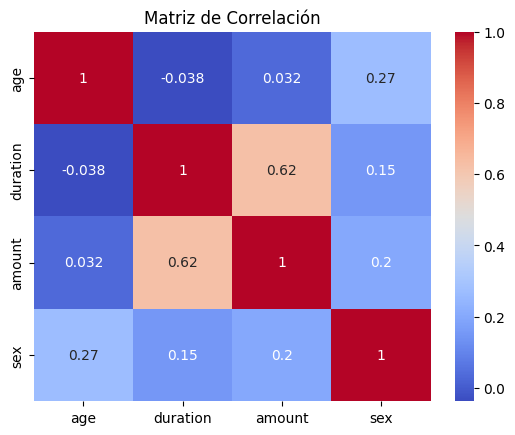

In [ ]:
X_num=df[["age","duration","amount","sex"]]
X_num["sex"] = df["sex"].map({"male": 1, "female": 0})

corr = X_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


Hay

In [ ]:
mitigador_cr = CorrelationRemover()
modelo_cr=DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
pipeline_cr = HolPipeline(steps=[("bm_preprocessing", mitigador_cr), ("estimator", modelo_cr),])
pipeline_cr.fit(X_train[["age","duration","amount"]],y_train, bm__group_a=X_train["sex_male"], bm__group_b=~X_train["sex_male"])
y_pred_cr = pipeline_cr.predict(X_test[["age","duration","amount"]], bm__group_a=X_test["sex_male"], bm__group_b=~X_test["sex_male"])

In [ ]:
df_eval_cr = X_test.copy()
df_eval_cr["y_true"] = y_test
df_eval_cr["y_pred"] = y_pred_cr


# Filtrar por género
male_df_cr = df_eval_cr[df_eval_cr["sex_male"] == True]
female_df_cr = df_eval_cr[df_eval_cr["sex_male"] == False]

In [ ]:
sp_male_cr, pp_male_cr, tpr_male_cr, fpr_male_cr = compute_metrics(male_df_cr)
sp_female_cr, pp_female_cr, tpr_female_cr, fpr_female_cr = compute_metrics(female_df_cr)

In [ ]:
print("{:<25} {:<15} {:<15} {:<15}".format("Métrica", "Masculino", "Femenino", "Diferencia (Fem - Masc)"))
print("-" * 70)
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("Statistical Parity", sp_male_cr, sp_female_cr, sp_female_cr - sp_male_cr))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("Predictive Parity", pp_male_cr, pp_female_cr, pp_female_cr - pp_male_cr))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("TPR (Equal Opportunity)", tpr_male_cr, tpr_female_cr, tpr_female_cr - tpr_male_cr))
print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format("FPR", fpr_male_cr, fpr_female_cr, fpr_female_cr - fpr_male_cr))

Métrica                   Masculino       Femenino        Diferencia (Fem - Masc)
----------------------------------------------------------------------
Statistical Parity        0.733           0.733           0.000          
Predictive Parity         0.770           0.636           -0.134         
TPR (Equal Opportunity)   0.796           0.724           -0.071         
FPR                       0.581           0.750           0.169          
